In [45]:
from keras.preprocessing.image import ImageDataGenerator

In [174]:
from Preprocess_image import take_n_resize_images as take
import numpy as np
import itertools

In [51]:
def PullOutArray(arr):
    newArr = np.zeros((arr.shape[0]*arr.shape[1], arr.shape[2], arr.shape[3], arr.shape[4]))

    counter = 0
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            newArr[counter] = arr[i][j]
            counter += 1
    #print(f"new_shape = {newArr.shape[0]}, {newArr.shape[1]}, {newArr.shape[2]}, {newArr.shape[3]}")
    return newArr

In [67]:
def Get_data(path_p, path_n, resolution, grayscale, num_examples, num_folders, input_shape, start_folder = 0, start_examples = 0):
    X1_input_p0 = np.zeros((num_folders, num_examples, input_shape[0], input_shape[1], input_shape[2]))
    X2_input_p0 = np.zeros((num_folders, num_examples, input_shape[0], input_shape[1], input_shape[2]))

    for i,j in enumerate(range(start_folder, num_folders+start_folder)):
        X1_input_p0[i] = take(f"{path_p}/({j})",
                             image_size = resolution,
                             grayscale = grayscale,
                             num_examples = num_examples,
                             start = start_examples)
        X2_input_p0[i] = X1_input_p0[i][::-1]
    
    #print(X1_input_p0.shape)
    #print(X2_input_p0.shape)

    X1_input_p = PullOutArray(X1_input_p0)
    X2_input_p = PullOutArray(X2_input_p0)

    Y_input_p = np.ones((X1_input_p.shape[0],1))
    #print(Y_input_p.shape)



    X1_input_n0 = np.zeros((num_folders, num_examples, input_shape[0], input_shape[1], input_shape[2]))
    X2_input_n0 = np.zeros((num_folders, num_examples, input_shape[0], input_shape[1], input_shape[2]))

    for i,j in enumerate(range(start_folder, num_folders+start_folder)):
        X1_input_n0[i] = take(f"{path_n}/({j})",
                       image_size = resolution,
                       grayscale = grayscale,
                       num_examples = num_examples,
                       start = start_examples)
        X2_input_n0[i] = take(f"{path_n}/({j+1})",
                   image_size = resolution,
                   grayscale = grayscale,
                   num_examples = num_examples,
                   start = start_examples)

    #print(X1_input_n0.shape)
    #print(X2_input_n0.shape)

    X1_input_n = PullOutArray(X1_input_n0)
    X2_input_n = PullOutArray(X2_input_n0)

    Y_input_n = np.zeros((X1_input_n.shape[0],1))
    #print("Y_input_n.shape: ", Y_input_n.shape)

    X1_input = np.vstack((X1_input_p, X1_input_n))
    #print("X1_input.shape: ", X1_input.shape)

    X2_input = np.vstack((X2_input_p, X2_input_n))
    #print("X2_input.shape: ", X2_input.shape)

    Y_input = np.vstack((Y_input_p, Y_input_n))
    #print("Y_input.shape: ", Y_input.shape)
    
    return X1_input, X2_input, Y_input

In [68]:
X1_generator = ImageDataGenerator(vertical_flip = True).flow_from_directory("datasets/test", classes=["cats"], color_mode = "rgb", target_size = (96,96), batch_size= 2)

Found 101 images belonging to 1 classes.


In [69]:
X1_generator

In [175]:
def generator(dir1, batch_size):
    for i in itertools.count():
        X1_input, X2_input, Y1_input = Get_data("../Datasets/Faces_dataset/Faces1000", 
                           "../Datasets/Faces_dataset/Faces1000",
                           resolution = (96,96),
                           grayscale = False,
                           start_examples = i,
                           num_examples = batch_size,
                           num_folders = 1,
                           input_shape = (96,96,3))

        yield [X1_input,X2_input],Y1_input

In [176]:
myGen = generator('', 2)

In [177]:
[print(tup[0][0].shape) for tup in myGen]

(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96, 3)
(4, 96, 96

KeyboardInterrupt: 

In [ ]:
train = [tup for tup in myGen]

In [169]:
train[9][0][0].shape

(4, 96, 96, 3)

In [25]:
train = [print(tup[0].shape) for i,tup in enumerate(X1_generator) if i >= 10]

(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(1, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96

(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(1, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(1, 96, 96

(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(1, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96, 3)
(2, 96, 96

KeyboardInterrupt: 

In [41]:
print("ls[0] = ",len(ls[0]))
print("ls[0][0] = ", len(ls[0][0]))
print("ls[0][0][0] = ", ls[0][0][0].shape)

print("\nls[0] = ",len(ls[0]))
print("ls[0][1] = ", ls[0][1].shape)
print(type(ls[1][0][0]))

ls[0] =  2
ls[0][0] =  2
ls[0][0][0] =  (4, 96, 96, 3)

ls[0] =  2
ls[0][1] =  (4, 1)
<class 'numpy.ndarray'>


[0.]


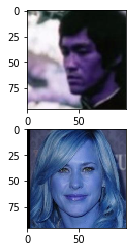

In [63]:
el1 = 0
el = 3
print(ls[el1][1][el])
_, ax = plt.subplots(2)
ax[0].imshow(np.array(ls[el1][0][0][el], dtype = "uint8"))
ax[1].imshow(np.array(ls[el1][0][1][el], dtype = "uint8"))

In [56]:
def generator(dir1, batch_size):
    for i in range(0,20,batch_size):
        
        print("i = ", i)
        X1_input, X2_input, Y1_input = Get_data("../Datasets/Faces_dataset/Faces1000", 
                           "../Datasets/Faces_dataset/Faces1000",
                           resolution = (96,96),
                           grayscale = False,
                           start_examples = i,
                           num_examples = batch_size,
                           num_folders = 1,
                           input_shape = (96,96,3))

        yield [X1_input,X2_input],Y1_input

In [62]:

train = [[a,b] for a,b in generator("datasets/test/dogs",2)]


i =  0
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  2
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  4
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  6
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  8
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  10
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  12
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  14
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  16
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)
i =  18
X1_input.shape:  (4, 96, 96, 3)
X2_input.shape:  (4, 96, 96, 3)
Y_input.shape:  (4, 1)


In [41]:
print("ls[0] = ",len(ls[0]))
print("ls[0][0] = ", len(ls[0][0]))
print("ls[0][0][0] = ", ls[0][0][0].shape)

print("\nls[0] = ",len(ls[0]))
print("ls[0][1] = ", ls[0][1].shape)
print(type(ls[1][0][0]))

ls[0] =  2
ls[0][0] =  2
ls[0][0][0] =  (4, 96, 96, 3)

ls[0] =  2
ls[0][1] =  (4, 1)
<class 'numpy.ndarray'>


[0.]


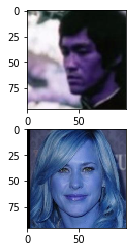

In [63]:
el1 = 0
el = 3
print(ls[el1][1][el])
_, ax = plt.subplots(2)
ax[0].imshow(np.array(ls[el1][0][0][el], dtype = "uint8"))
ax[1].imshow(np.array(ls[el1][0][1][el], dtype = "uint8"))